# Computer Vision - P4

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments and answers need to be in **English**.

- The deliverable must be a file named **P4_Student1_Student2.zip** that includes:
    - The notebook P4_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.

**Deadline (Campus Virtual): November 22th, 23:00 h** 

==============================================================================================
## Descriptors extraction for object detection, based on template matching, ORB, and HOG
==============================================================================================

The main topics of Laboratory 4 are:

    4.1) SSD and Normalized Cross-correlation for template matching

    4.2) HOG image descriptor for object (person) detection

    4.3) Recognition by correspondance, based on feature extraction (ORB)

In order to complete this practicum, the following concepts need to be understood: template matching, feature localization (Harris, Censure), feature descriptor (HOG,ORB, Sift) methods.

It is highly recommendable to structure the code in functions in order to reuse code for different tests and images and make it shorter and more readable. Specially the visualization commands should be encapsulated in separate functions.

## 1 Template matching

**1.1** Given the image 'einstein.png' and the template image 'eye.png', detect the location of the template in the image comparing the use of:
- SSD distance (hint: norm() in numpy.linalg).
- normalized cross-correlation (hint: match_template() of skimage.feature).

Don't forget to normalize the images (having pixel values between [0,1]) before comparing them.

In [1]:
# Your solution here
from skimage.color import rgb2gray
from skimage.feature import hog, match_descriptors, match_template, ORB, plot_matches
from skimage.transform import AffineTransform, rotate, warp
from skimage import color, exposure, io, img_as_float
from skimage.color import rgba2rgb
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import numpy as np
from os import listdir

In [2]:
def visualize_image(image, title):
    
    """
    Function that visualizes only one image and its corresponding title above.
    """
    
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.axis("off")
    
    plt.show()

In [3]:
def visualize_image_group(images, titles):
    
    """
    Given a list of images and its corresponding titles,
    shows all the images in a row with each title above.
    """
    
    f, axarr = plt.subplots(1, len(images))
    f.set_size_inches(15, 15)
    
    for i in range(len(images)):
    
        axarr[i].imshow(images[i], cmap='gray')
        axarr[i].set_title(titles[i])
        
        axarr[i].xaxis.set_visible(False)
        axarr[i].yaxis.set_visible(False)
        
    plt.show()

In [4]:
def threshold_SSD(result, threshold):

    
    """
    Function that shows the parts of the result image that have lower values than the threshold.
    """
    
    return result < threshold

In [5]:
def ssd(image, template, threshold):# sum of square differences 
    #doble bucle for  ---->∑_(𝑘,𝑙)▒〖(𝑔[𝑘,𝑙]〗− 𝑓[𝑚+𝑘,𝑛+𝑙])^2 = suma de la diferencias entre el template y la imagen al cuadrado

    image = img_as_float(image)
    template = img_as_float(template) #46x46
    
    # The result will be stored in a matrix
    dimensions = [image.shape[i] - template.shape[i] for i in range(2)]
    
    # The result will be stored in a matrix.
    result = np.ones(dimensions)   

    
    # we will check how alike they are n times where n is equal to image.shape - template.shape 
    for i in range(image.shape[0]-46):
        for j in range(image.shape[1]-46):
        
            # Get the squared differences (binary) and store them in an array --> the region with 
            # less differences is where the template is located
            dim = (template - image[i: i + template.shape[0], j: j + template.shape[1]])**2 
             

            dist = np.sum(dim)# sumatori
            
            # Apply the filter to a concrete region of the image.
            region = image[i: i + template.shape[0], j: j + template.shape[1]] - template
            result[i][j] = np.linalg.norm(region)
    


           

            
    # Return the resultant image and the image that shows where the template is.
    return [result, threshold_SSD(result, threshold)]

In [6]:
def threshold_crossc(result, threshold):
    
    """
    Function that shows the parts of the result image that have higher values than the threshold.
    """
    
    return result > threshold

In [7]:
def cross_correlation(image, template, threshold):
    
    image = img_as_float(image)
    template = img_as_float(template)
    
    # Apply the filter.
    result = match_template(image, template)
        
    
    # Return the resultant image and the image that shows where the template is.
    return [result, threshold_crossc(result, threshold)]

Create a function for template matching applying SSD distance and normalized cross-correlation and display the results in the following format:
    
<img src="images_notebook/tm.png" width="400" height="120">

**Use titles in all figures to understand what is being displayed.**

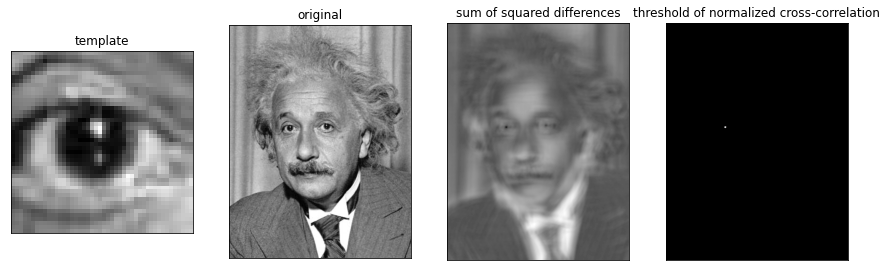

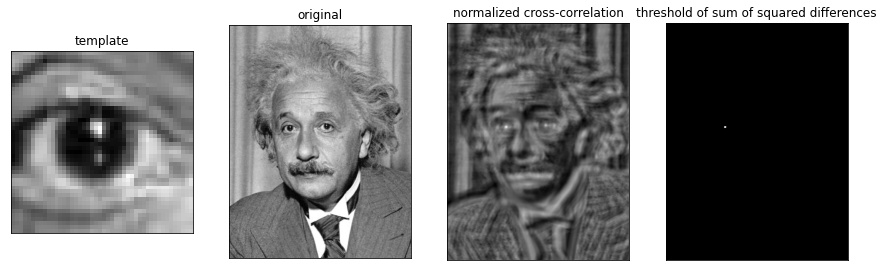

In [8]:
# Your solution here
# Import the images.
einstein = io.imread("images/einstein.png")
eye = io.imread("images/eye.png")
# falta convert rgba to rgb

einstein = rgba2rgb(einstein)
eye = rgba2rgb(eye)

# And convert to gray scale.
image = rgb2gray(einstein)
template = rgb2gray(eye)

# First, we get the results of the euclidean distance algorithm.
result = ssd(image, template, threshold=7)

# Store them neatly.
images = [template, image] + ssd(image, template, threshold=7)
titles = ["template", "original", "sum of squared differences", "threshold of normalized cross-correlation"]

# And visualize it all.
visualize_image_group(images, titles)

# Second, we get the results of the cross correlation algorithm and store it neatly.
images = [template, image] + cross_correlation(image, template, threshold=0.65)
titles = ["template", "original", "normalized cross-correlation", "threshold of sum of squared differences"]

# And visualize it all.
visualize_image_group(images, titles)

**1.2** How does the result of the template matching change if the image changes its contrast (for example if you make it clearer or darker)? 

Similarly to the previous case, please, visualize the euclidean distance and normalized cross-correlation images as well as the binarized (thresholded) images in the two cases.

**Note:** Use titles of the figures to explain what is displayed.


Read `einstein_br.png` and display the results on this image, using `eye.png` as template:

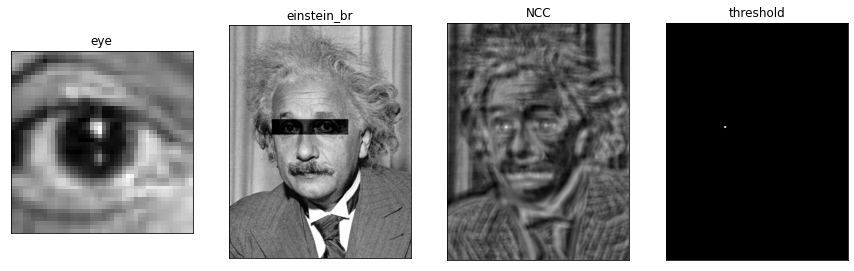

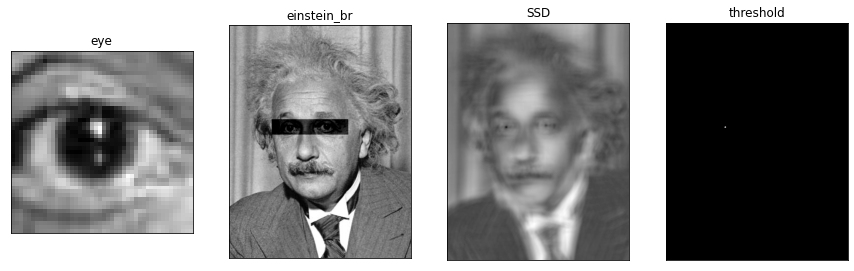

In [9]:
# Your solution here
einstein_br = io.imread("images/einstein_br.png")
einstein_mask = io.imread("images/einstein_mask.png")
template = rgb2gray(eye)

result = cross_correlation(einstein_br, template, threshold=0.65)
images = [template, einstein_mask] + result
titles = ["eye", "einstein_br", "NCC", "threshold"]

visualize_image_group(images, titles)

result = ssd(einstein_br,  template, threshold=7)
images = [template, einstein_mask] + result
titles = ["eye", "einstein_br", "SSD", "threshold"]

visualize_image_group(images, titles)

Print the minimum SSD and the maximum Normalized Cross-Correlation (NCC)

In [10]:
# Your solution here
print ("minimum SSD: ", ssd(einstein_br, template, threshold=7)[0].min(),
       "max NCC: ", cross_correlation(einstein_br, template, threshold=0.65)[0].max())

minimum SSD:  3.0698531963845404 max NCC:  0.9768232838639557


**1.3** Read `einstein_mask.png` and display the results on this image, using the `eye.png` template:

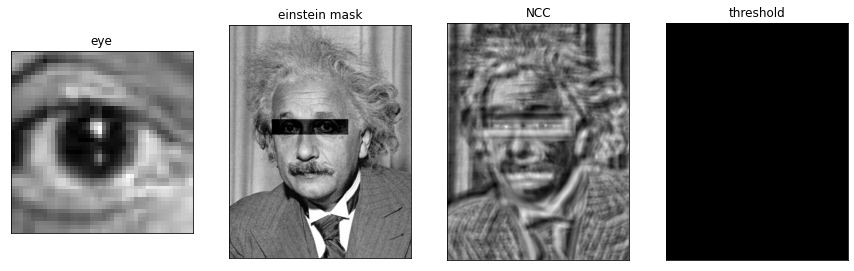

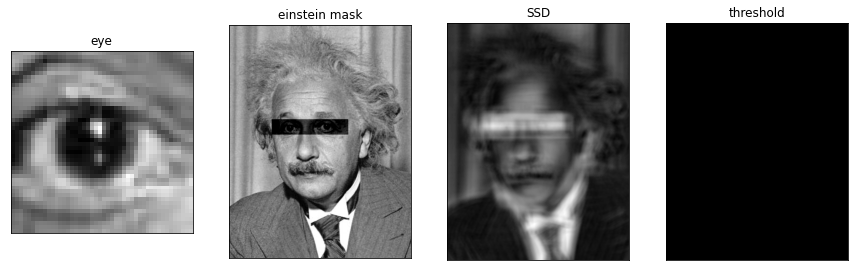

In [11]:
# Your solution here
einstein_mask = io.imread("images/einstein_mask.png")

result = cross_correlation(einstein_mask, template, threshold=0.65)
images = [template, einstein_mask] + result
titles = ["eye", "einstein mask", "NCC", "threshold"]

visualize_image_group(images, titles)

result = ssd(einstein_mask,  template, threshold=7)
images = [template, einstein_mask] + result
titles = ["eye", "einstein mask", "SSD", "threshold"]

visualize_image_group(images, titles)

Print the minimum SSD and the maximum NCC

In [12]:
# Your solution here
print ("minimum SSD: ", ssd(einstein_mask, template, threshold=7)[0].min(),
       "max NCC: ", cross_correlation(einstein_mask, template, threshold=0.65)[0].max())

minimum SSD:  8.27263708944657 max NCC:  0.6166362739337297


#### What are the distances between the template and the image around the eyes of the image? 
The distances around the eye will have very different values, so as not to be detected as an eye.

Comment the template matching process:

***Is the algorithms affected by contrast changes in the image?***
* Yes, whe we change the contrast, the template matching process doesn't works

***How do metrics (i.e. minimum euclidean distance and maximum NCC) change in all previous cases? Is there a big difference among these values?***
* The minimum SSD increases a lot compared to the other method,  from 3,06 to 8,27

***What parameters it has and which measure for image comparisons works better.***
* We use a template of the eye, the input image, and the threshold. The best method is combine the normalize the image and the X-Correlation

**1.4** How does the result of the template matching change if instead the template is the one that changes its contrast (for example if you make it clearer or darker)? To this purpose, use the `eye_br.png` template.

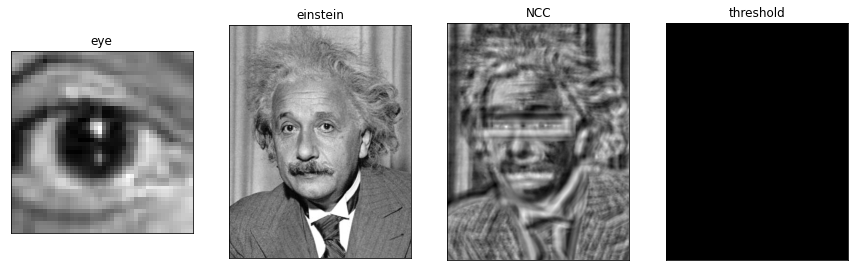

In [13]:
# Your solution here
gray_mask=io.imread('./images/einstein_mask.png')
gray_template = io.imread("images/eye_br.png")




cross_correlation(gray_mask, gray_template, threshold = 0.5)

result = cross_correlation(gray_mask, gray_template, threshold=0.65)
images = [template, image] + result
titles = ["eye", "einstein", "NCC", "threshold"]

visualize_image_group(images, titles)

Check how the result changes if the template is rotated.

Visualize the template and its rotation by 2º, 5º, 10º, 15º and 20º. Obtain again the template matching using the Euclidean distance and normalized cross-correlation.

**Help:** use the function rotate() in skimage.transform

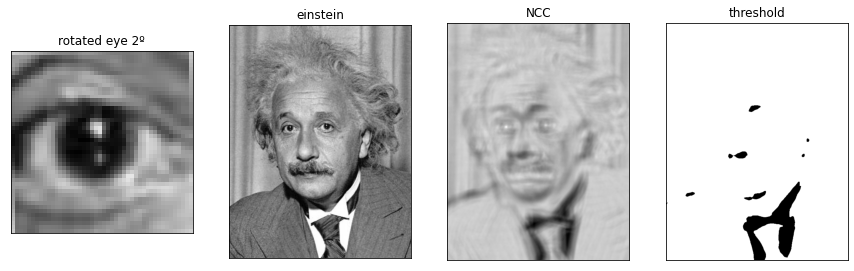

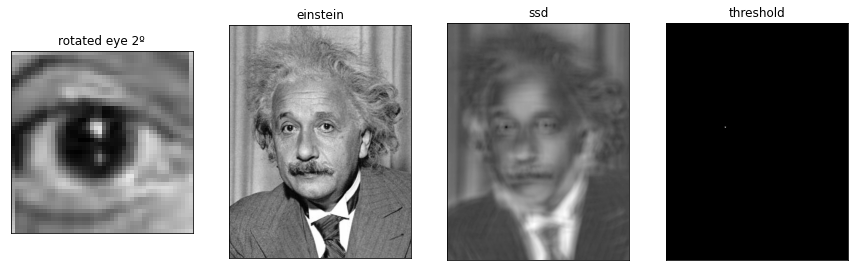

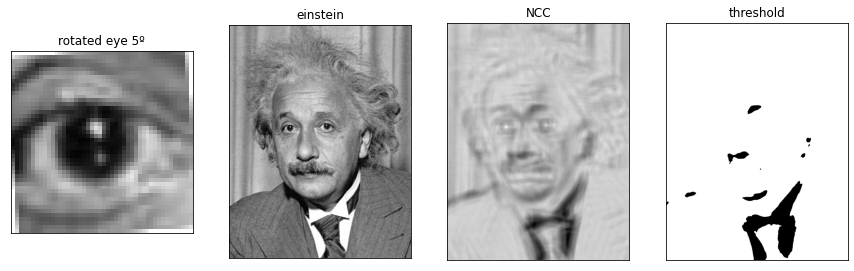

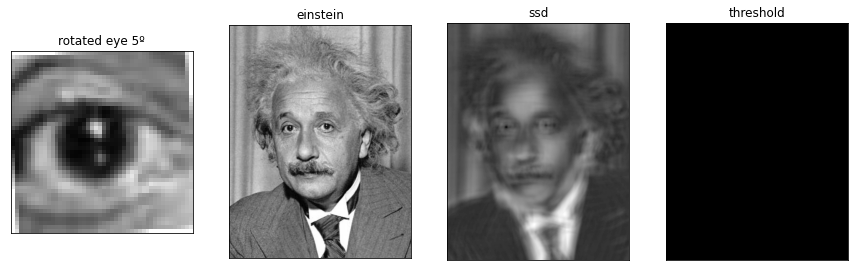

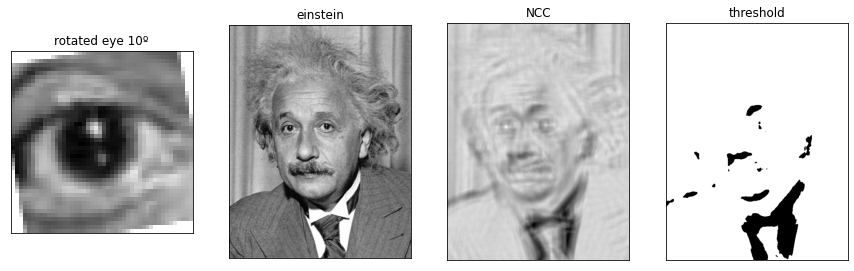

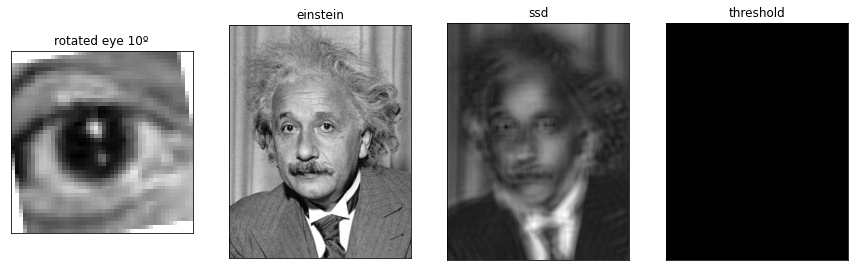

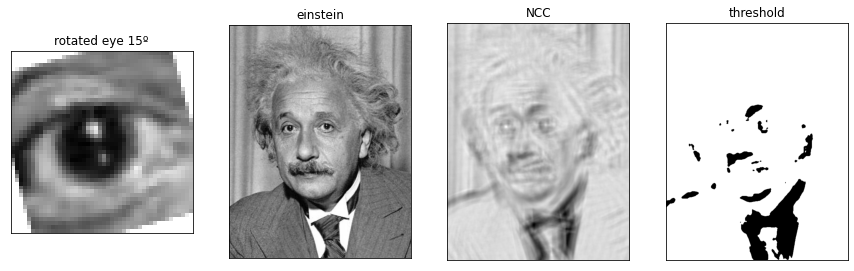

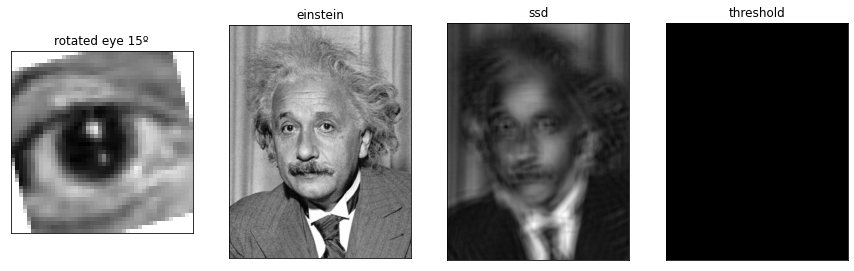

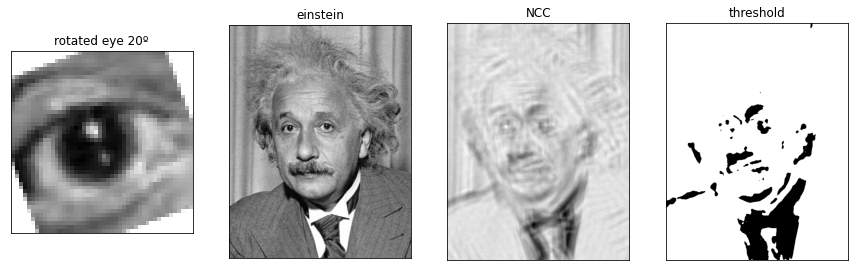

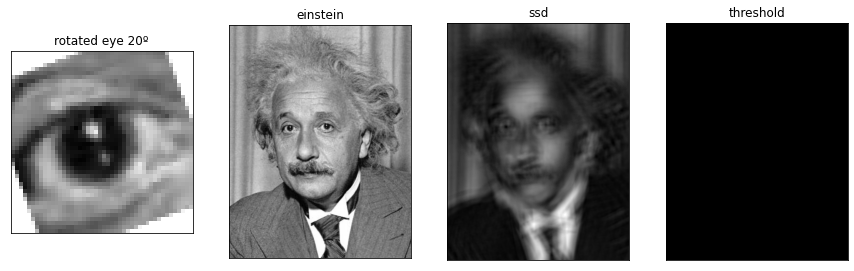

In [14]:
# Your solution here

einstein = io.imread("images/einstein.png")
eye = io.imread("images/eye.png")




rotated_template = rotate(eye, 2)

result = cross_correlation(einstein, rotated_template, threshold=0.46)
images = [rotated_template, einstein] + result
titles = ["rotated eye 2º" , "einstein", "NCC", "threshold"]

visualize_image_group(images, titles)

result = ssd(einstein,  rotated_template, threshold=10.8)
images = [rotated_template, einstein] + result
titles = ["rotated eye 2º" , "einstein", "ssd", "threshold"]

visualize_image_group(images, titles)




rotated_template = rotate(eye, 5)

result = cross_correlation(einstein, rotated_template, threshold=0.46)
images = [rotated_template, einstein] + result
titles = ["rotated eye 5º" , "einstein", "NCC", "threshold"]

visualize_image_group(images, titles)

result = ssd(einstein,  rotated_template, threshold=10.8)
images = [rotated_template, einstein] + result
titles = ["rotated eye 5º" , "einstein", "ssd", "threshold"]

visualize_image_group(images, titles)




rotated_template = rotate(eye, 10)

result = cross_correlation(einstein, rotated_template, threshold=0.46)
images = [rotated_template, einstein] + result
titles = ["rotated eye 10º" , "einstein", "NCC", "threshold"]

visualize_image_group(images, titles)

result = ssd(einstein,  rotated_template, threshold=10.8)
images = [rotated_template, einstein] + result
titles = ["rotated eye 10º" , "einstein", "ssd", "threshold"]

visualize_image_group(images, titles)




rotated_template = rotate(eye, 15)

result = cross_correlation(einstein, rotated_template, threshold=0.46)
images = [rotated_template, einstein] + result
titles = ["rotated eye 15º" , "einstein", "NCC", "threshold"]

visualize_image_group(images, titles)

result = ssd(einstein,  rotated_template, threshold=10.8)
images = [rotated_template, einstein] + result
titles = ["rotated eye 15º" , "einstein", "ssd", "threshold"]

visualize_image_group(images, titles)




rotated_template = rotate(eye, 20)

result = cross_correlation(einstein, rotated_template, threshold=0.46)
images = [rotated_template, einstein] + result
titles = ["rotated eye 20º" , "einstein", "NCC", "threshold"]

visualize_image_group(images, titles)

result = ssd(einstein,  rotated_template, threshold=10.8)
images = [rotated_template, einstein] + result
titles = ["rotated eye 20º" , "einstein", "ssd", "threshold"]

visualize_image_group(images, titles)

Comment the template matching process:

**** Please, explain briefly the algorithm, including advantages and disadvantage***

**** Is the algorithms affected by contrast changes in the tempate image?***

**** What parameters it has and which measure for image comparisons works better.***

First algorithm, we make the SSD between the template and the image. This gives us the similarity of the image with the template. Its advantage is: the speed of execution of the algorithm. Its disadvantage is: sensitivity to changes in intensity.
The second algorithm is the normalized X-correlation, first the image and the template are normalized and we perform the comparison obtaining the similarity. Its advantage is: invariant to changes in intensity. Downside: slower running algorithm

# 2 Histogram of Oriented Gradients

In this section we will treat the following topic: HOG image descriptor. Application to person detection.

The Histogram of Oriented Gradients (HOG) feature descriptor is classical image descriptor for object detection.

Given the image `person_template.bmp` and the folder `/images/TestPersonImages/`, apply the HOG descriptor in order to detect where there is a person in the images. To this purpose, apply the "sliding window" technique. We use images from GRAZ 01 data from [INRIA datasets](http://pascal.inrialpes.fr/data/human/).

**2.1.** Read the template (`person_template.bmp`), obtain its HOG descriptor (with the optimal parameters) and visualize it.

Help: the HOG detector function is in the skimage.feature library ([Help](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py)).

In [15]:
# Your solution here
def get_HOG(image):
    
    """
    Function that returns the HOG of a given image.
    """
    
    image = img_as_float(rgb2gray(image))
    
    # Get the HOG of the previous image.
    return hog(image, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(3, 3), visualize=True)[1]
    
    #return exposure.rescale_intensity(hog_image, in_range=(0, 20))
    
    

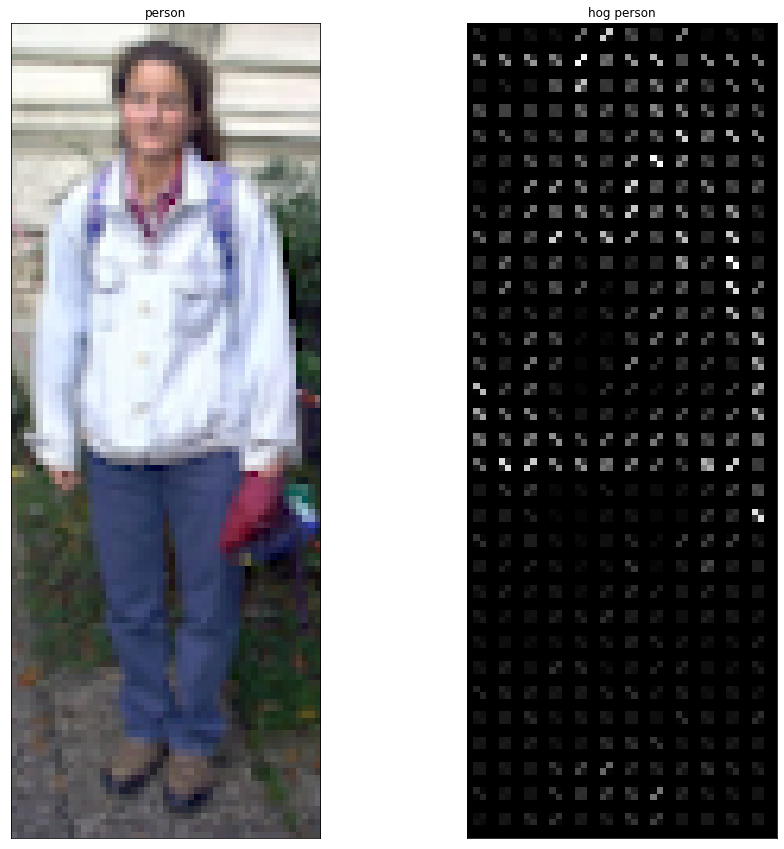

In [16]:
# Import the images.
person = io.imread("images/person_template.bmp")
person = rgba2rgb(person)
# Store them neatly.
images = [person, get_HOG(person)]
titles = ["person", "hog person"]

# And visualize it all.
visualize_image_group(images, titles)

**2.2.** Apply the HOG descriptor on the complete set of images for person detection.

a) Read images from the folder "TestPersonImages", slide a window on each image, obtain the HOG descriptor and compare to the HOG descriptor of the person template. 

b) Visualize the location in the image that is the most similar to the person template using the distance between the template and test image descriptors.

Display the results of every person detection following this format:

<img src="images_notebook/hog.png" width="800" height="100">

In [17]:
# Your solution here
def compare_hogs(template, image):
    """
    Compara un template am una image mitjançant HOG
    :param template: Template que volem utilitzar
    :param image: Imatge a trobar el template amb HOG
    """
    # Generate the HOG of the template
    hog_template = get_HOG(template)

    dimensions = [image.shape[i] - template.shape[i] for i in range(2)]
    # Create a black image to put the HOG with the size of the original image
    result = np.ones([image.shape[0],image.shape[1]])
    
    data = []
    
    # Slicing with x of 5
    for i in range(0, dimensions[0], 5):
        for j in range(0, dimensions[1], 5):
            
            # Center for the result HOG to display
            posx = template.shape[0]+i-(int(template.shape[0]/2))
            posy = template.shape[1]+j-(int(template.shape[1]/2))
            
            # Get the region of the image to generate the HOG
            region = image[i:i+template.shape[0],j:j+template.shape[1]]
            hog_region_rescaled = exposure.rescale_intensity(get_HOG(region), in_range=(0,20))
            
            # Do euclidean distance with HOG of our region and our template
            hog_distance = np.linalg.norm(hog_region_rescaled - hog_template)
            result[posx,posy] = hog_distance
            
            # Save the information into the PriorityQueue
            data += [[hog_distance, [i, j]]]
        
    minims = [min(data)[1][1], min(data)[1][0]]
    
    # Generate two rectangles for the HOG and the original image
    rect = patches.Rectangle(minims, template.shape[1], template.shape[0], edgecolor='r', facecolor='none')
    rect1 = patches.Rectangle(minims, template.shape[1], template.shape[0], edgecolor='r', facecolor='none')

    return [template, image, result, rect, rect1]





In [18]:
def visualize_HOG(images, titles):
    
    figures, ax = plt.subplots(ncols=3, figsize=(15,20))
    ax[0].imshow(images[0], cmap='gray')
    ax[0].set_title(titles[0])
    ax[1].imshow(images[1], cmap='gray')
    ax[1].add_patch(images[3])
    ax[1].set_title(titles[1])
    ax[2].imshow(images[2], cmap='gray')
    ax[2].set_title(titles[2])
    ax[2].add_patch(images[4])
    plt.show()

Imatge numero:  0


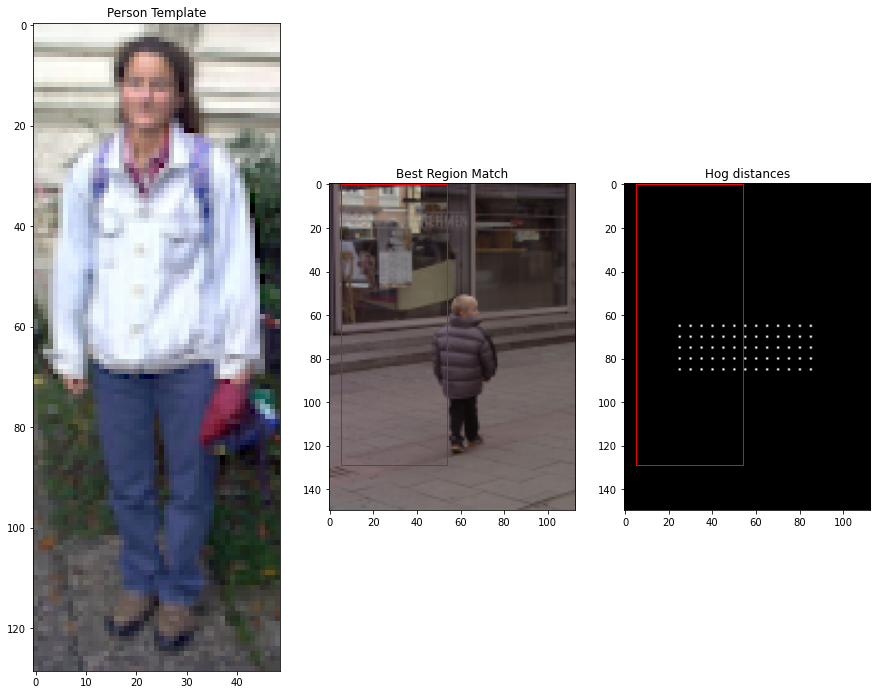

Imatge numero:  1


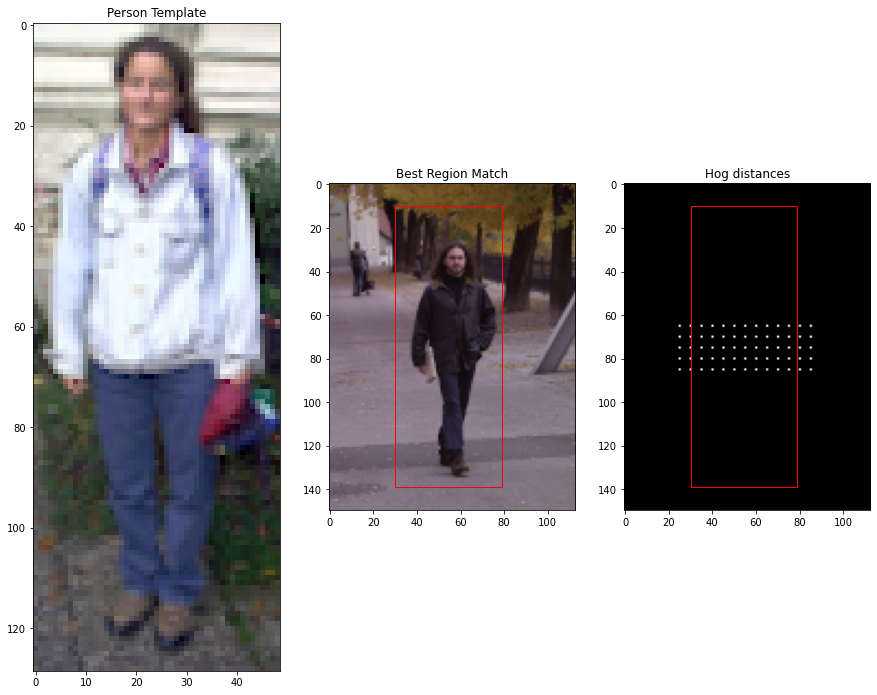

Imatge numero:  2


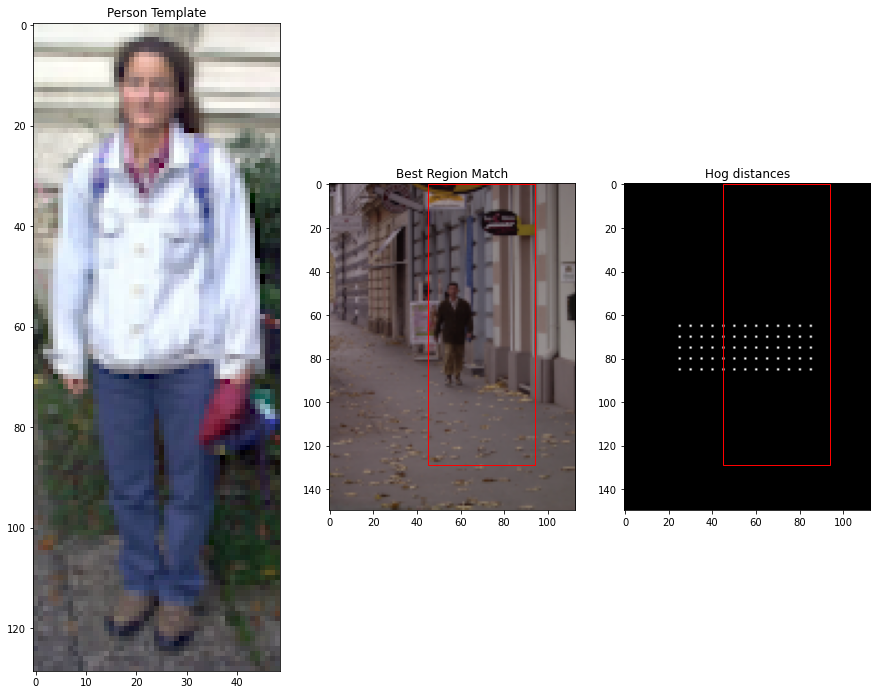

Imatge numero:  3


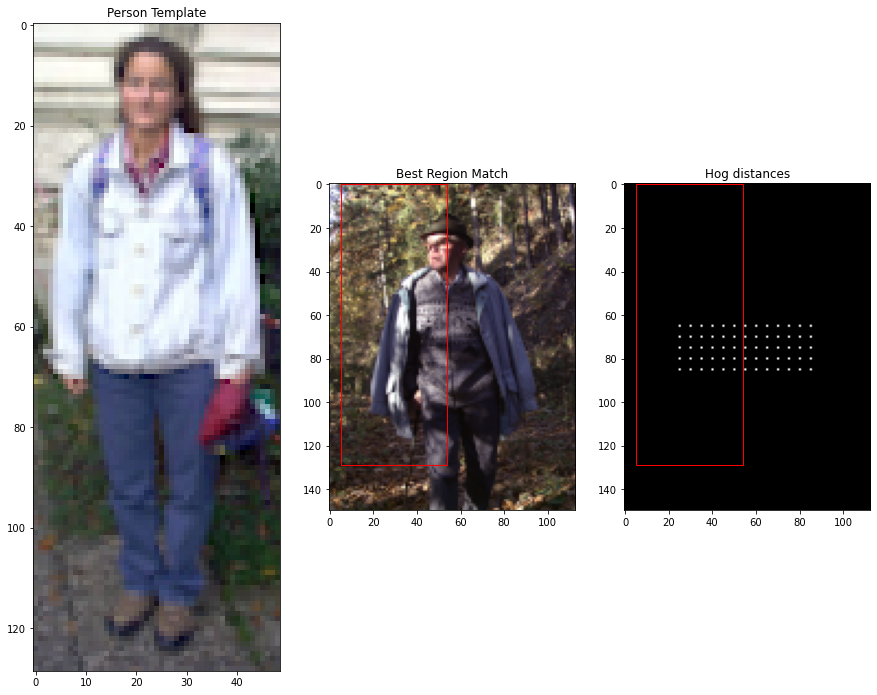

Imatge numero:  4


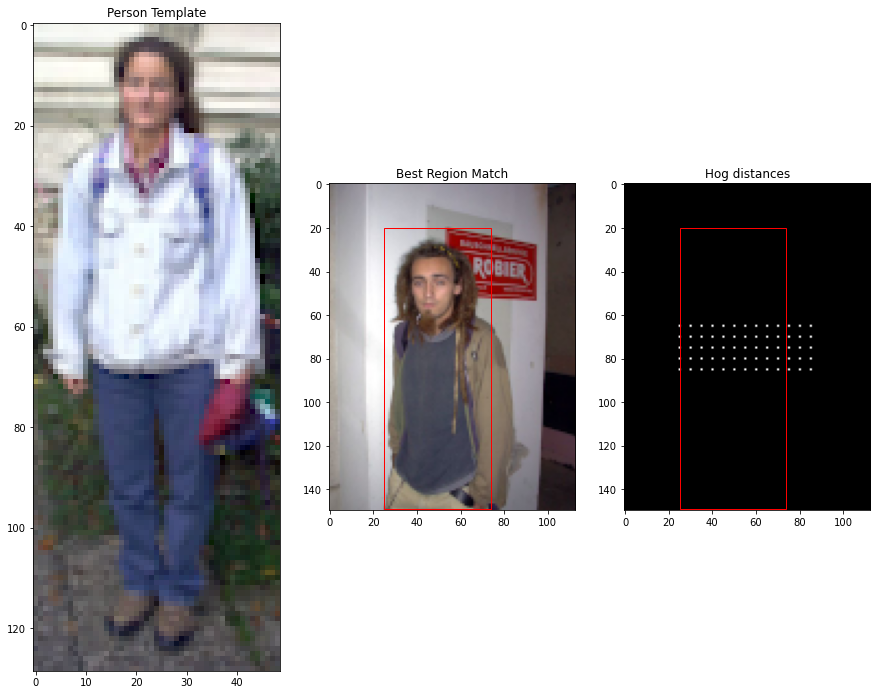

Imatge numero:  5


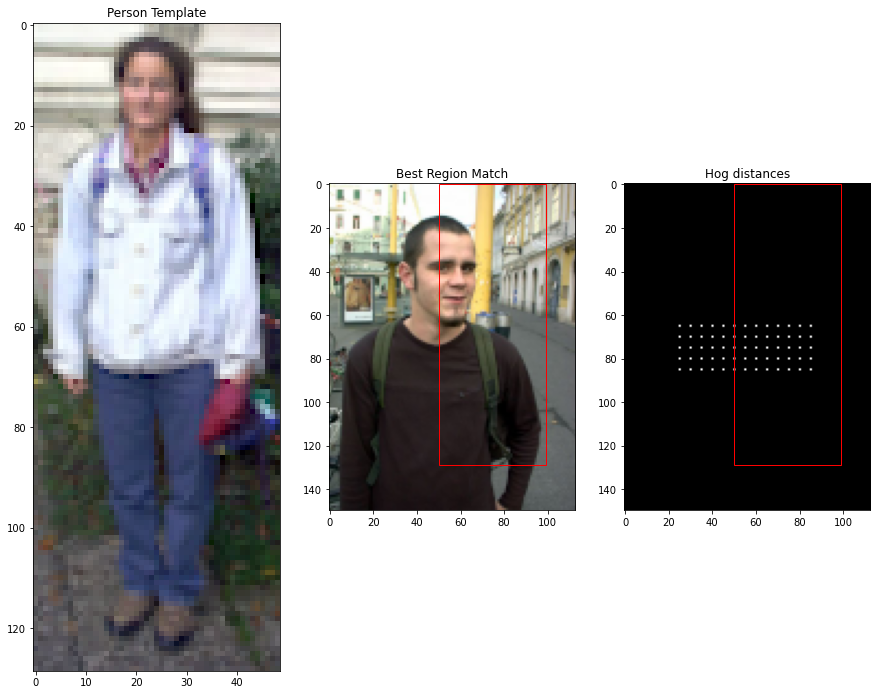

Imatge numero:  6


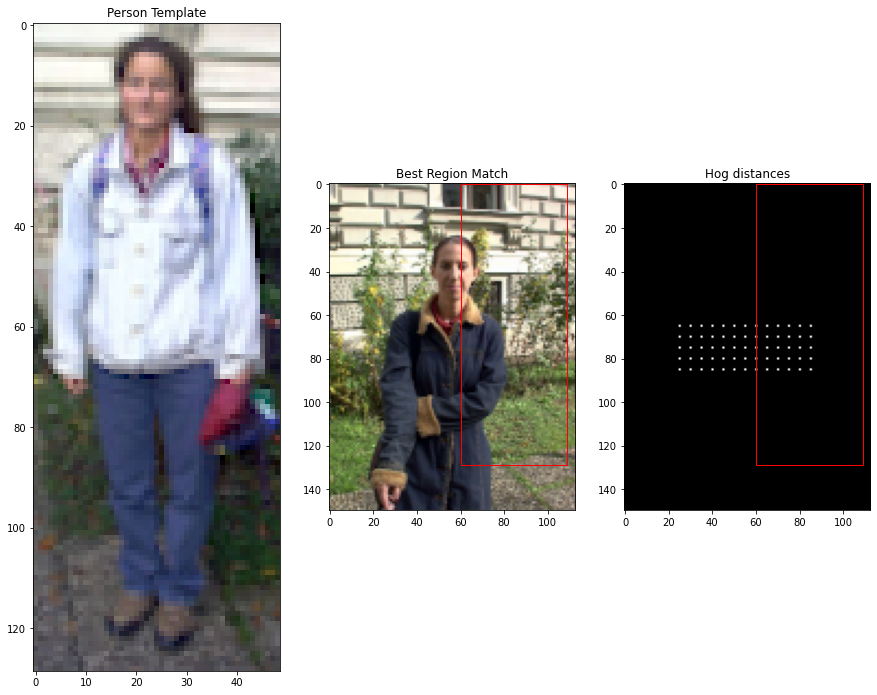

Imatge numero:  7


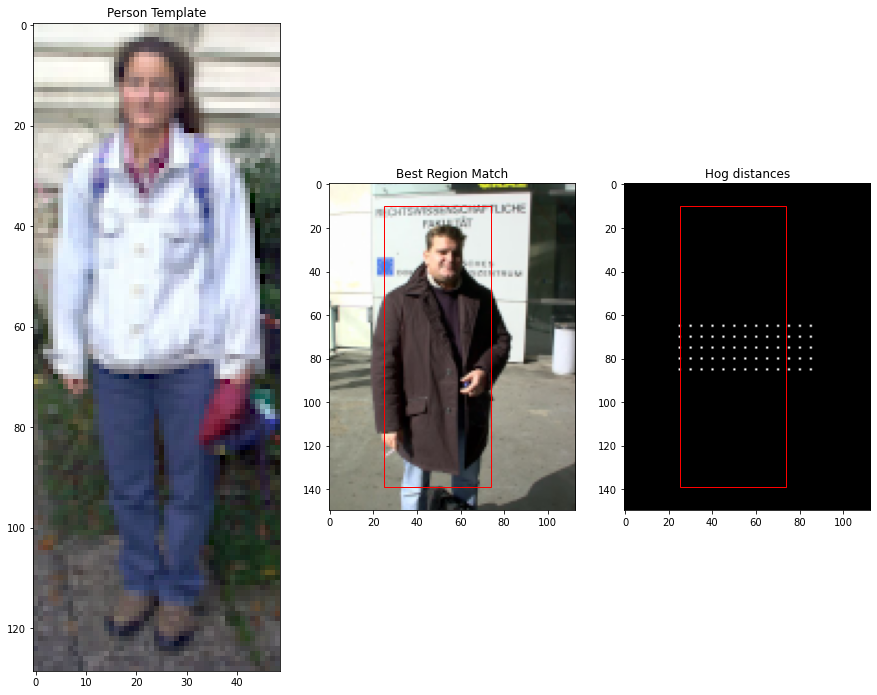

Imatge numero:  8


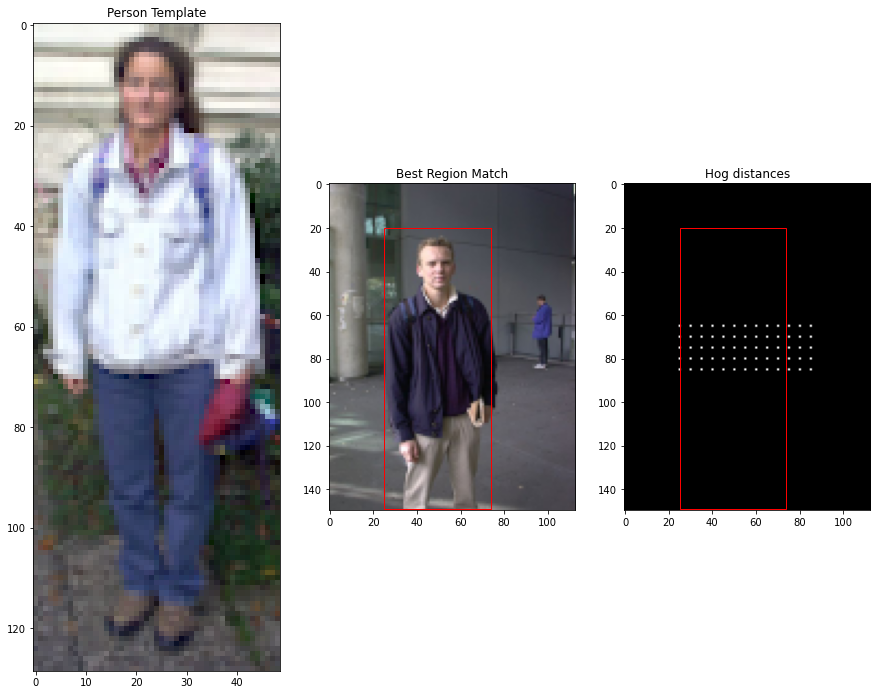

Imatge numero:  9


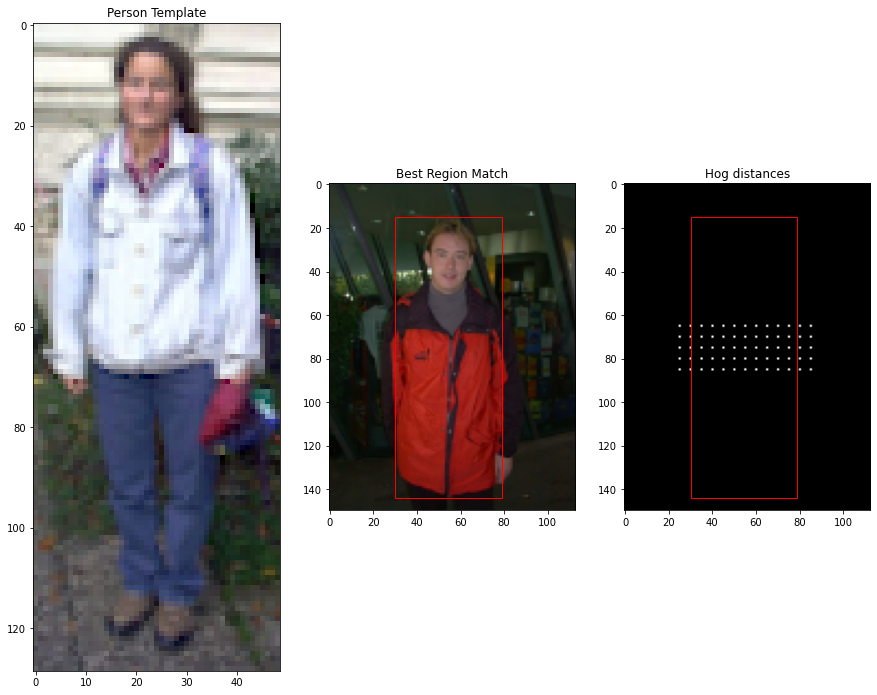

Imatge numero:  10


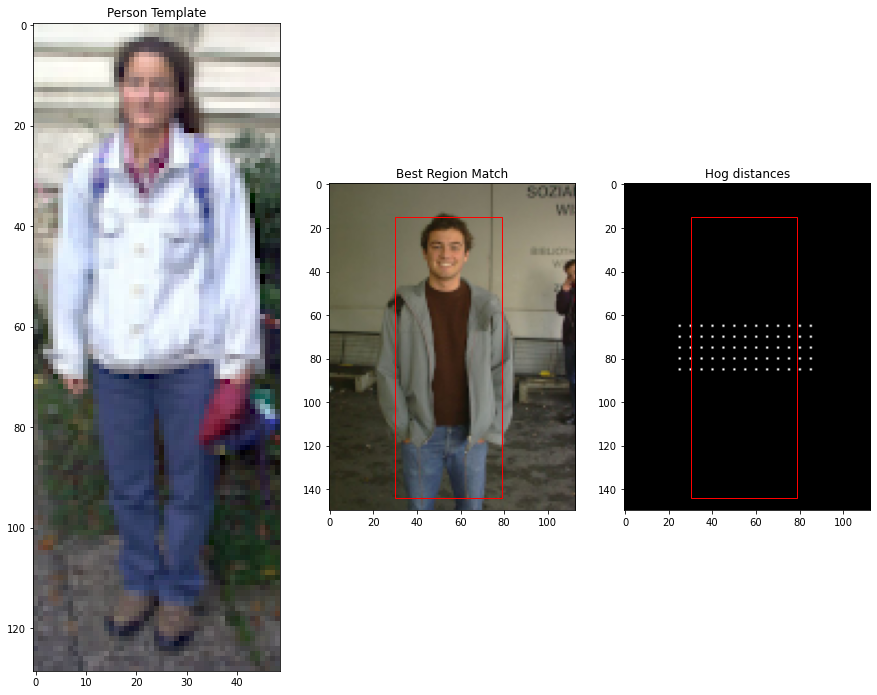

Imatge numero:  11


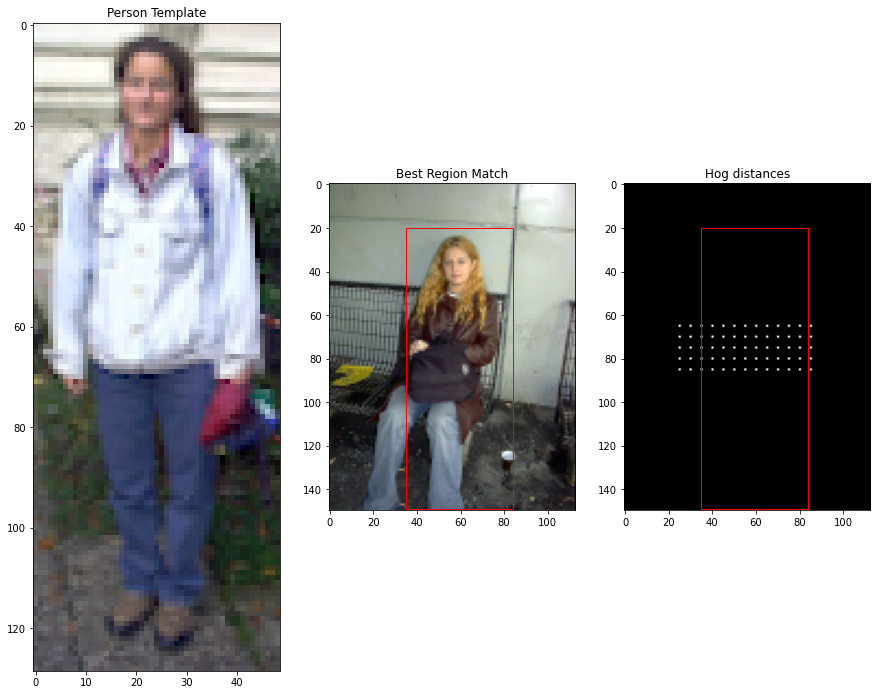

Imatge numero:  12


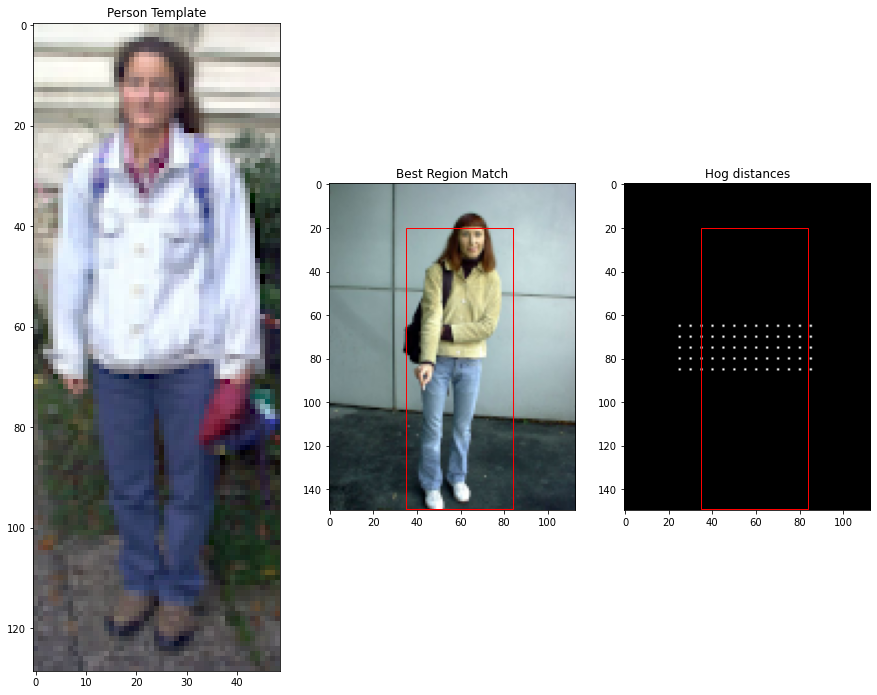

Imatge numero:  13


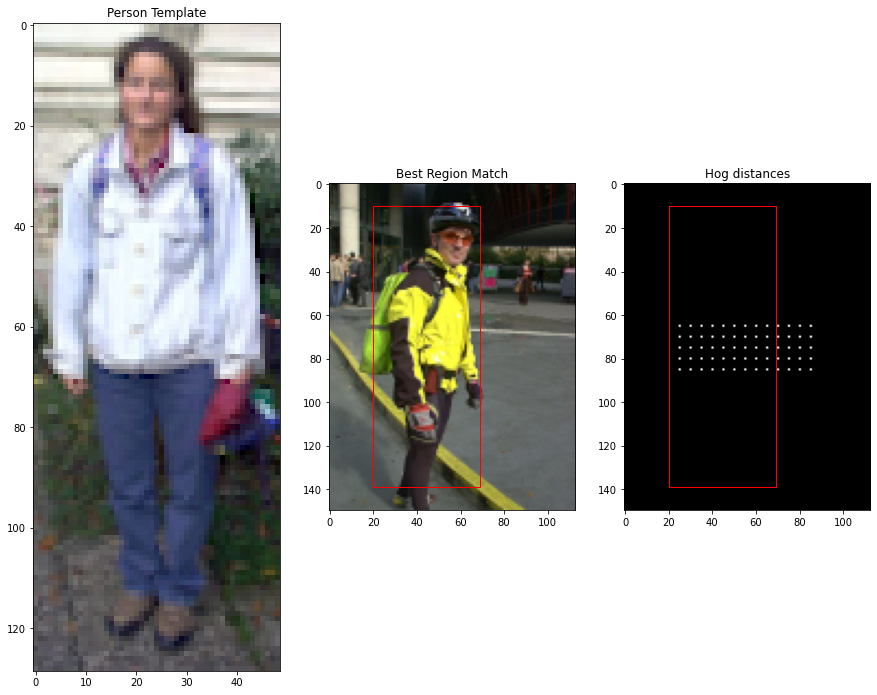

Imatge numero:  14


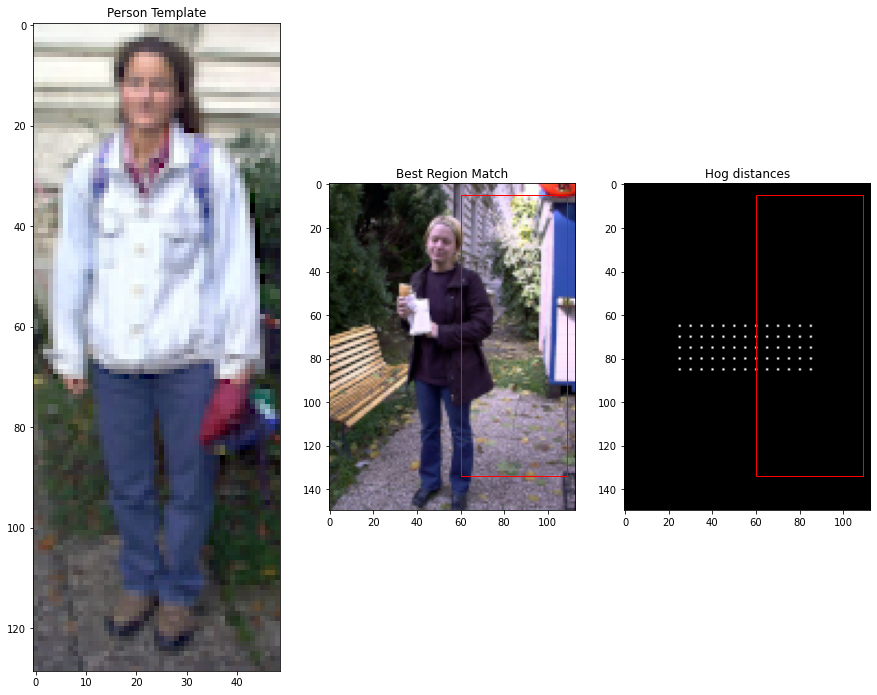

In [19]:
ic = io.ImageCollection('./images/TestPersonImages/*.bmp')
person = io.imread('./images/person_template.bmp')
person = rgba2rgb(person)

for i,im in enumerate(ic):
    print("Imatge numero: ", i)
    visualize_HOG(compare_hogs(person, im), ["Person Template", "Best Region Match", "Hog distances"])

#### What is the dimension of your HOG descriptor? Explain it.

The dimension is different for every image... It depends on the shape of the original image because the image is formed by blocks, the blocks by cells and the cells by pixels.

#### Count on how many images were the persons detected correctly and discuss the failures.
#### What do you think can be the reasons for the failures?
10 out of 15 images have been recognized perfectly, the failure is often due to the scale and closeness of the person in the image, also due to the pose and age of the person.

Test several values of the parameters (``orientations``, ``pixels_per_cell``, ``cells_per_block``) to show which are the optimal values for the person detection problem.

orientations: 360 degrees divided into 9 containers of 40 degrees each, to determine the orientation of the image. With lower orientations we will have a better result

pixel_per_cell: we use it to determine the amount of pixels that we will find in a cell. The more pixels per cell, much more information we will have in the HOG

cells_per_block: we use it to determine the number of blocks in which we divide the image, how many cells will a block have. The more cells within the blocks we will obtain more information in the vector of characteristics

Comment the object detection process:

**** Please, explain briefly the algorithm, including advantages and disadvantage***
- It is an algorithm for the detection of objects, which compares the vector of template characteristics with a set of images, obtaining a box with the maximum coincidence. Advantages: invariance to changes in intensities/contrasts 


**** Do you see any advantages of the HOG-based object detector compared to the template-based object detection? (The answer should be up to 10-15 lines).***
- Through the detection algorithm based on HOG, we obtain an advantage which is that the detection result is invariant to changes in intensities and contrasts. Much better than some variant algorithms to changes in intensity. Disadvantages: rotation variant, in this algorithm we cannot find matches between a template and the image if one of the two is rotated, therefore it will not find a match.

# 3 ORB feature detector and binary descriptor

Let us consider the problem of feature extraction that contains two subproblems: 
- feature location, 
- image feature description.

Let us focus on ORB, an approximation of SIFT method, and analyse if ORB is  scale and rotation invariant, a property that is very important for real-time applications.

**Hint:** `ORB` is a function within the module `skimage.feature`
                             
**Help**: We suggest to have a look at the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) how to compute the ORB descriptors and find the descriptors match. You can use the function match_descriptors from `skimage.feature` module in order to compute and show the similar detected descriptors of the given images. 

**3.1** Detect the censure in the image `starbucks4.jpg`. Analyze and discuss the effect of different values of the parameters in censure function.

Text(0.5, 1.0, 'Keypoints')

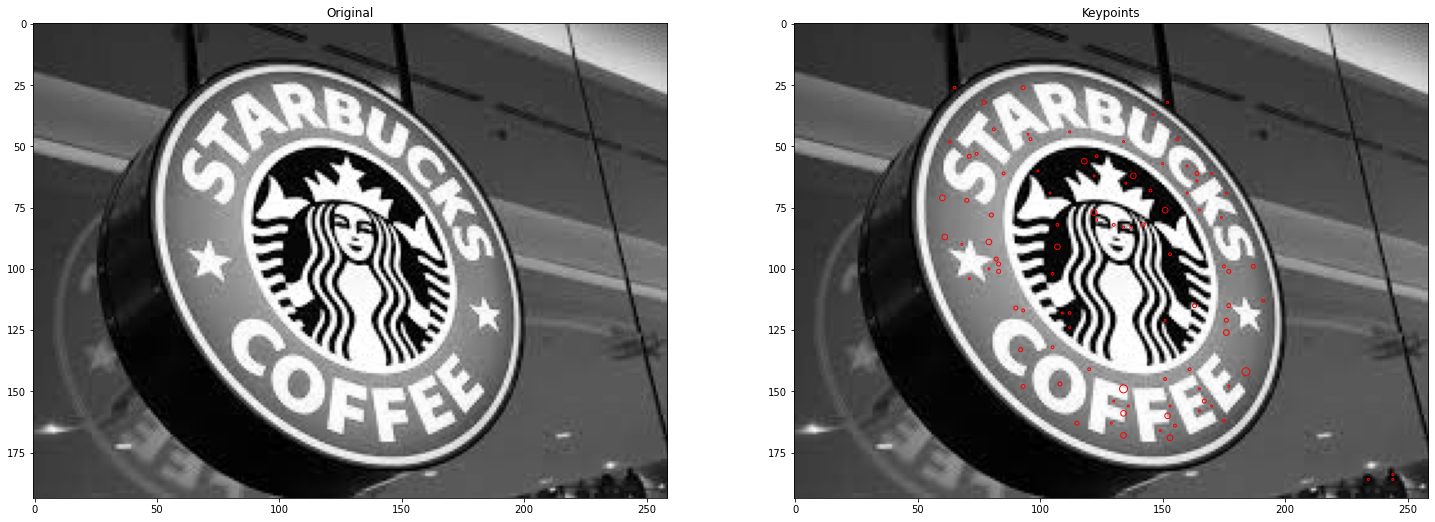

In [29]:
# Your solution here
from skimage import data
from skimage import transform
from skimage.feature import CENSURE
from skimage.color import rgb2gray

starbucks4 = io.imread('./images/starbucks4.jpg')
starbucks4_gray=rgb2gray(starbucks4)

data = CENSURE(min_scale=1, max_scale=7, mode='DoB', non_max_threshold=0.1, line_threshold=8)    

data.detect(starbucks4_gray)



fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(25,15))

ax = axs[0]
ax.imshow(starbucks4_gray, cmap=plt.cm.gray)
ax.set_title("Original")

ax = axs[1]
ax.imshow(starbucks4_gray, cmap=plt.cm.gray)
ax.scatter(data.keypoints[:, 1], data.keypoints[:, 0], 2**data.scales, facecolors='none', edgecolors='r')
ax.set_title("Keypoints")





**3.2** Detect the correspondences between the model image `starbucks.jpg` with the scene image `starbucks4.jpg`. You can adapt the code from the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) above. 

Define a function get_ORB implementing the algorithm in order to be able to apply it on different images. Comment the code in detail.

**Hint: If the function plot_matches() gives you an error you can use the plot_matches_aux() at the end of this file.**

Analyze and discuss the effect of different values of the parameter `max_ratio` in the match_descriptors function.


In [21]:
# Your solution here
def orb_images(model, scene):
   
    # Convert to grayscale
    model = img_as_float(rgb2gray(model))
    
    data = []
    
    # we will compare all images with the model
    for frame in scene:
        
        # Convert to float
        if frame.shape[2] ==4:
            frame = rgba2rgb(frame)
        frame = img_as_float(rgb2gray(frame))
        #extract descriptor
        descriptor_extractor = ORB(n_keypoints=200)
        
        images = [model, frame]
        keypoints = []
        descriptors = []
        
        # For every concrete frame
        for image in images:
            descriptor_extractor.detect_and_extract(image)
            keypoints += [descriptor_extractor.keypoints]
            descriptors += [descriptor_extractor.descriptors]
            
        # Obtain the common points between the two images.
        matches = match_descriptors(descriptors[0], descriptors[1], cross_check=True)
        data += [[images, keypoints, matches]]
        
    return data

In [22]:
def visualize_matches(images):

    # For all the comparisons.
    for item in images:

        # Print how common are both images.
        print('Similariry: ', abs(len(item[2]) / 2), '%')

        # Declare the plot where we will show the image.
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 15))

        # Show both images and its matches.
        plot_matches(ax, item[0][0], item[0][1], item[1][0], item[1][1], item[2])
        ax.axis('off')
        ax.set_title("Original_Starbucks_Image - Starbucks_Image_Colection")
        plt.show()

Similariry:  42.0 %


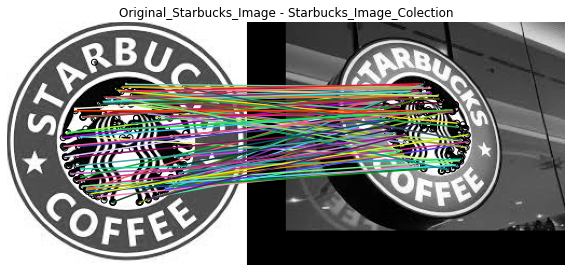

In [23]:
# Import the images.
model = io.imread('./images/starbucks.jpg')
scene = io.imread('./images/starbucks4.jpg')

# Visualize the results of the ORB algorithm for the two previous images.
visualize_matches(orb_images(model, [scene]))

Repeate the experiment comparing the `starbucks.jpg` image as a model, and showing its matches to all Starbucks images, sorting them based on their similarity to the model. Comment when does the algorithm work better. 

Similariry:  30.5 %


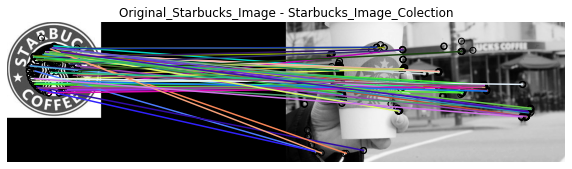

Similariry:  34.0 %


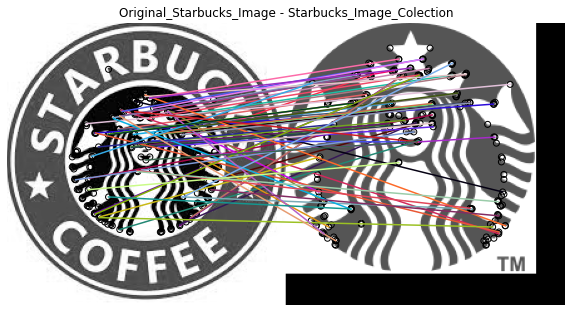

Similariry:  34.5 %


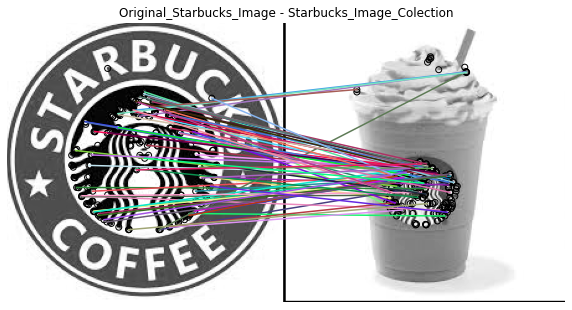

Similariry:  36.0 %


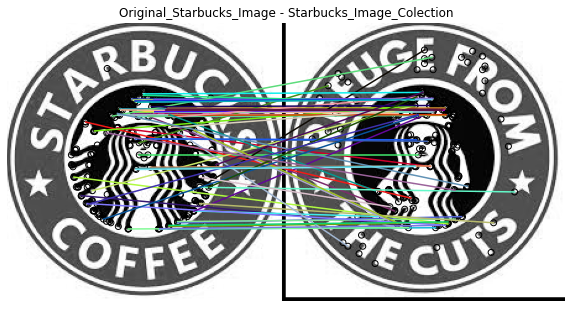

Similariry:  42.0 %


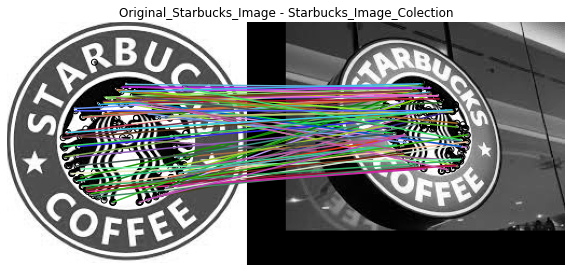

Similariry:  100.0 %


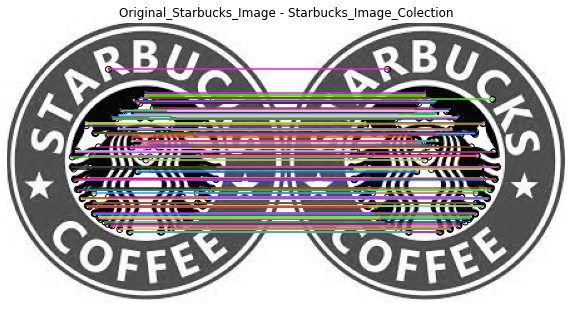

In [24]:
# Your solution here
def similarity(item):
    return len(item[2])

# Import the images.
scene = io.ImageCollection('images/starbucks*')
model = io.imread('./images/starbucks.jpg')
# Get the results of the ORB algorithm. 


        
orbed = orb_images(model, scene)

# Sort in inverse order by the length of the matches.
orbed.sort(key=similarity)

# Visualize all.
visualize_matches(orbed)

**3.3** Repeate the experiment: 
- Changing the orientation of the model image by rotating it and comparing it with its original version. Help: you can use the rotate() function from skimage.transform 
- Change the scale and orientation of the scene image and compare it with the model image.

**Help:** To do so, you can use the function given below as example:

```
import transform as tf
rotationdegrees = 180
img_rotated = tf.rotate(image2transform, rotationdegrees)
```

or

```
tform = tf.AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
img_transformed = tf.warp(image2transform, tform)
```

Similariry:  48.5 %


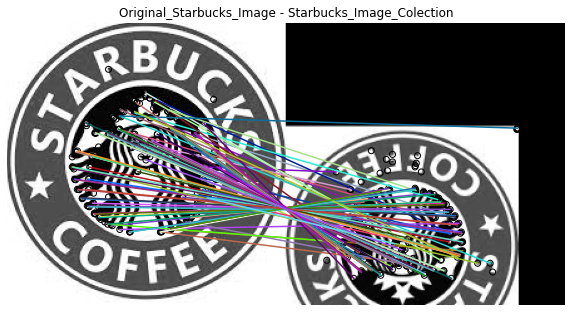

In [25]:
# Your solution here
def rotate_and_rescale_image(model, rotationdegrees):
    # rescale
    tform = AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
    # rotate
    model_rotated = warp(rotate(model, rotationdegrees), tform)
    return model_rotated

model = io.imread('./images/starbucks.jpg')
scene = rotate_and_rescale_image(model, 180)

# Visualize the results of the ORB algorithm for the two previous images.
visualize_matches(orb_images(model, [scene]))

**(Optional)** Repeat the experiment (3.1 to 3.3) with a new group of images. You could use Coca-Cola advertisements or from another famous brand, easily to find on internet.


In [26]:
# Your solution here

**3.4** Analysis of the applied techniques and results

***- What are the advantages of the ORB object detection with respect to the HOG and template object detector?***

- The ORB method is rotation invariant, whereas the template object detector and HOG methods are not rotation invariant.


***- What would happen if you analyse an image that does not contain the Starbucks logo?***
- Nothing would happen, it will compare two images and we will see some matches but not corresponding with the Starbuck logo because this not exists.

***- Could you think of ways of defining a quality measure for the correspondance between two images? (no need of implementing it)***
- We can create an algorithm that when we obtain a big part of the lines in paralel or if we have a hight %, it would mean that the points have been correctly matched


### Appendix

In [27]:
# In case the plot_matches() function gives you some problems, you can use the following one:

from skimage.util import img_as_float
import numpy as np

def plot_matches_aux(ax, image1, image2, keypoints1, keypoints2, matches,
                 keypoints_color='k', matches_color=None, only_matches=False):
    """Plot matched features.
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Matches and image are drawn in this ax.
    image1 : (N, M [, 3]) array
        First grayscale or color image.
    image2 : (N, M [, 3]) array
        Second grayscale or color image.
    keypoints1 : (K1, 2) array
        First keypoint coordinates as ``(row, col)``.
    keypoints2 : (K2, 2) array
        Second keypoint coordinates as ``(row, col)``.
    matches : (Q, 2) array
        Indices of corresponding matches in first and second set of
        descriptors, where ``matches[:, 0]`` denote the indices in the first
        and ``matches[:, 1]`` the indices in the second set of descriptors.
    keypoints_color : matplotlib color, optional
        Color for keypoint locations.
    matches_color : matplotlib color, optional
        Color for lines which connect keypoint matches. By default the
        color is chosen randomly.
    only_matches : bool, optional
        Whether to only plot matches and not plot the keypoint locations.
    """

    image1 = img_as_float(image1)
    image2 = img_as_float(image2)

    new_shape1 = list(image1.shape)
    new_shape2 = list(image2.shape)

    if image1.shape[0] < image2.shape[0]:
        new_shape1[0] = image2.shape[0]
    elif image1.shape[0] > image2.shape[0]:
        new_shape2[0] = image1.shape[0]

    if image1.shape[1] < image2.shape[1]:
        new_shape1[1] = image2.shape[1]
    elif image1.shape[1] > image2.shape[1]:
        new_shape2[1] = image1.shape[1]

    if new_shape1 != image1.shape:
        new_image1 = np.zeros(new_shape1, dtype=image1.dtype)
        new_image1[:image1.shape[0], :image1.shape[1]] = image1
        image1 = new_image1

    if new_shape2 != image2.shape:
        new_image2 = np.zeros(new_shape2, dtype=image2.dtype)
        new_image2[:image2.shape[0], :image2.shape[1]] = image2
        image2 = new_image2

    image = np.concatenate([image1, image2], axis=1)

    offset = image1.shape

    if not only_matches:
        ax.scatter(keypoints1[:, 1], keypoints1[:, 0],
                   facecolors='none', edgecolors=keypoints_color)
        ax.scatter(keypoints2[:, 1] + offset[1], keypoints2[:, 0],
                   facecolors='none', edgecolors=keypoints_color)

    ax.imshow(image, interpolation='nearest', cmap='gray')
    ax.axis((0, 2 * offset[1], offset[0], 0))

    for i in range(matches.shape[0]):
        idx1 = matches[i, 0]
        idx2 = matches[i, 1]

        if matches_color is None:
            color = np.random.rand(3)
        else:
            color = matches_color

        ax.plot((keypoints1[idx1, 1], keypoints2[idx2, 1] + offset[1]),
                (keypoints1[idx1, 0], keypoints2[idx2, 0]),
                '-', color=color)